### overall skam  Preview the raw data

In [4]:
import glob
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import os
import datetime
import matplotlib
import logging
import csv

# logging.basicConfig(filename='output.log' , level= logging.DEBUG)
# print = logging.debug

def skam(flist , M = 200 , sample_second_space = 15 , sample_fre = 1000 ,  start = 0 , span = 20):
    datalist = []
    timestring = []     
    re_sample_fre = sample_fre // M
    # print(start)
    for fname in flist[ start : start + span ]:
        utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
        timestring.append(utc_datetime.time())
        utc_day = utc_datetime.strftime("%Y/%m/%d")
        # print(fname)
        data = dp.read_das(fname ,ch1=800, ch2=890)
        # raw_clim = max( data.std() / 10 , raw_clim)
        datalist.append(data)

    data = np.concatenate(datalist, axis = 1)
    if M > 1 :
        data = signal.decimate(data, M, axis = 1)

    # data.shape (#channle , re_sample_fre * sample_second_space * span)
    step_per_file = re_sample_fre * sample_second_space
    step_this_span = (span+1) * step_per_file 
    timeindex = range(0 , step_this_span ,step_per_file)
    timestring.append((utc_datetime + datetime.timedelta(seconds=+15)).time())
    return data , timestring , timeindex , utc_day

def cal_std(flist , csv_writer,  M = 200 , sample_second_space = 15 , sample_fre = 1000 ,  start = 0 , span = 20):
 
    datalist = []
    timestring = [] 
    std  = []
    re_sample_fre = sample_fre // M

    print("std of "+str(sample_second_space * span) + "seconds")

    if span > 1:
        for fname in flist[ start : start + span ]:
            utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
            timestring.append(utc_datetime.time())         
            data = dp.read_das(fname,ch1=870,ch2=890)
            datalist.append(data)
        data = np.concatenate(datalist, axis = 1)
        data = signal.decimate(data, M, axis = 1)

        std.append(data.std())
    if span < 1:
        fname = flist[start]
        data = dp.read_das(fname,ch1=820,ch2=900)
        data = signal.decimate(data, M, axis = 1)

        utc_datetime = datetime.datetime.strptime(fname[-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
        timedelta = sample_second_space*span
        step_per_file = re_sample_fre * sample_second_space
        step_std_span = span * step_per_file 
        for i in range(0 ,  int(1/span)):
            std_i = data[ : , int( i * step_std_span): int ((i+1)* step_std_span )].std()
            std.append(std_i)
            utc_datetime = utc_datetime + datetime.timedelta(seconds=timedelta)
            timestring.append(utc_datetime.time().strftime("%H:%M:%S.%f")[:-3])         
            csv_writer.writerow([str(utc_datetime.time().strftime("%H:%M:%S.%f")[:-3])+" " , str(std_i) ])
    return timestring , std



def plot_timeticks(data , timestring , timeindex , clim_rate = 10 ,title = "Figue.png") :
    plt.figure(figsize=[16,18])
    plt.title(title)

    clim= data.std() 
    d_clim = data.std() / clim_rate
    # norm = matplotlib.colors.Normalize(vmin=-clim, vmax=+clim)

    print(clim)
    plt.xticks(timeindex,timestring,rotation = 20, ha = 'right')
    # plt.yticks(range(0,80,10),range(820,900,10))
    plt.imshow(data, aspect='auto', cmap='RdBu', vmin=-d_clim, vmax=d_clim )
    # plt.imshow(data, aspect='auto', cmap='RdBu', norm=norm )
    plt.xlabel("clim / " + str(clim))
    plt.colorbar()
    # plt.show()
    
    

In [5]:

flist = glob.glob('../../czyc/test3/*.h5')
flist.sort()
test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_064027.357.h5')[0][0] #5806 
print(len(flist),test1_file_num)


9750 4008


skam speed： 1s /file

hammer signal at （datetime，file num，span，channle ，clim rate ）
20240104_065327（4061 , 3 , 890 , 1）

20240104_070442 (4105 , 3 , 830 , 1)

锤击点3_file = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_070442.357.h5')[0][0]  #4105

锤击点2_file = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_065342.357.h5')[0][0]  #4061

noise record at 

test 1 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_060927.357.h5')[0][0] #3885

test 2 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_064027.357.h5')[0][0] #3885

test 3 :test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_072227.357.h5')[0][0] #3885

test 4: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_180327.357.h5')[0][0] 

test 5: test1_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_191327.357.h5')[0][0] 



cal std per 0.2 second

In [6]:

# span_each_pic = 1 / 75
# decimate_rate = 1
# with open('example.csv', 'w' , encoding= 'utf-8',newline="") as f:
#     csv_writer = csv.writer(f)
#     for n in range(0,140):
#         timestring ,std = cal_std(flist , csv_writer,M=decimate_rate, start= test1_file_num + n ,span= span_each_pic)


skam for 4 min 

有几点改进的地方，尽快修改一下：1.PSD的横纵轴要统一，das数据和噪声分别以统一的尺度画图；2.把两组数据对比，要在同一个频段下，考虑0-200 Hz；3. 每张图要标好注释，注明是用的哪个数据画的

In [7]:
# # %matplotlib ipympl
# %matplotlib inline

# path = '../output/test2_psd_v2/'

# if not os.path.exists(path):
#     os.makedirs(path)
#     print("Folder created")
# else:
#     print("Folder already exists")

# span_each_pic = 16
# decimate_rate = 1
# [Pxx0,f0] = [0,0]
# for n in range(0,1):
#     data , timestring , timeindex ,utc_day = skam(flist ,M=decimate_rate, start= test1_file_num + span_each_pic * n - 1,span= span_each_pic)
#     data1 = dp.das_preprocess(data)
#     data2 = dp.tapering(data1, 0.2)
#     data2 = dp.lowpass(data2, 0.001, fh=400)
#     data2 = dp.das_preprocess(data2)
#     nfft = 4096
#     print(x.shape)
#     x = data[60,:]
#     fs = 1000
#     plt.figure(figsize=(12,12))
#     plt.axis([-600,600,-40,40])
#     plt.title(str(utc_day)+" "+str(timestring[0])+" to "+str(timestring[-1]))

#     [Pxx1,f1] = plt.psd(x,                       # 随机信号
#                     NFFT=nfft,               # 每个窗的长度
#                     Fs=fs,                   # 采样频率
#                     detrend='mean',          # 去掉均值
#                     window=np.hanning(nfft), # 加汉尼窗
#                     noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
#                     sides='twosided')        # 求双边谱
    
#     Pxx0 += Pxx1
#     # plt.savefig(path+'/Figure '+str(n+1)+'_ch880_lp400.png')
#     plt.show()
#     plt.close

#     # plt.figure()
#     # plt.plot(f1,Pxx0)
#     # plt.yscale("log")
#     # plt.show()
# # plt.savefig(path+'/ch_880_psd_overlap.png')

In [8]:
# # %matplotlib ipympl
# %matplotlib inline

# path = '../output/test1_skam/'

# if not os.path.exists(path):
#     os.makedirs(path)
#     print("Folder created")
# else:
#     print("Folder already exists")

# span_each_pic = 12
# decimate_rate = 200
# for n in range(0,10):
#     data , timestring , timeindex = skam(flist ,M=decimate_rate, start= test1_file_num + span_each_pic * n - 1,span= span_each_pic)
#     data =  dp.das_preprocess(data)
#     plot_timeticks(data,timestring ,timeindex ,clim_rate=20 ,title ="M="+str(decimate_rate)+",date:20240105" )
    
#     plt.savefig(path+'/Figure '+str(n+1)+'all10_clim_rate_20.png')
#     plt.close

one channle 

In [9]:

# ch=830
# start_time = 0
# pic_name = 'M='+str(decimate_rate)+' ,channel'+str(ch)
# plt.figure(figsize=[20,12])
# plt.xticks(timeindex[0:span_each_pic-start_time],timestring[start_time:],rotation = 60, ha = 'right')
# plt.plot(data[ch,start_time*75:])
# plt.title(pic_name)
# # plt.savefig(path+str(n+1)+'.png')


noise overview 

In [10]:
# import librosa
# import glob
# from scipy import signal
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Load the audio file
# path = '../output/noise/'
# if not os.path.exists(path):
#     os.makedirs(path)
#     print("Folder created")
# else:
#     print("Folder already exists")

# for n in range(1,6):
#     test_n = str(n)
#     AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
#     samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
#     samples = samples[ : 32421888]

#     data = samples
#     # data1 = dp.das_preprocess(data)
#     nt = data.shape[0]

#     window = signal.windows.tukey(nt, 0.2) #taping
#     data2 = data * window[:]
#     sos = signal.butter(6, 400, 'lp', fs=sample_rate, output='sos') # lowpass
#     data2 = signal.sosfiltfilt(sos, data2)
#     nfft = 40000 #psd 窗长度

#     # data2 = dp.das_preprocess(data2)
#     print(samples.size , sample_rate)

#     N = samples.size
#     #pdt
#     x = data2
    
#     fs = sample_rate
#     plt.figure(figsize=(12,12))
#     plt.axis([-500,500,-120,-60])
#     plt.title("test_"+test_n)

#     [Pxx1,f1] = plt.psd(x,                       # 随机信号
#                     NFFT=nfft,               # 每个窗的长度
#                     Fs=fs,                   # 采样频率
#                     detrend='mean',          # 去掉均值
#                     window=np.hanning(nfft), # 加汉尼窗
#                     noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
#                     sides='twosided')        # 求双边谱

#     plt.savefig(path+'/test'+test_n+'_noise_psdv2_lp400.png')
#     plt.show()
#     plt.close




In [11]:
# #声波可视化：
# import librosa.display
# import matplotlib.pyplot as plt

# # x-axis has been converted to time using our sample rate. 
# # matplotlib plt.plot(y), would output the same figure, but with sample 
# # number on the x-axis instead of seconds
# plt.figure(figsize=(14, 5))
# plt.title("visualize the sound wave")
# librosa.display.waveshow(samples, sr=sample_rate , color="blue")


# # use the decibel scale 
# plt.figure(figsize=(14, 5))
# plt.title("use the decibel scale ")
# db_sgram = librosa.amplitude_to_db(samples, ref=np.min)
# librosa.display.waveshow(db_sgram, sr=sample_rate,color = "red")


# # use the power scale 
# plt.figure(figsize=(14, 5))
# plt.title("use the power scale ")
# power_s= (np.abs(samples))**2
# # print(samples[40:80], power_s[40:80])
# plt.plot(power_s)

# #声谱图
# plt.figure(figsize=(14, 5))
# plt.title("Spectrogram")
# sgram = librosa.stft(samples)
# librosa.display.specshow(sgram)


# # 使用梅尔刻度代替频率。
# # use the mel-scale instead of raw frequency
# plt.figure(figsize=(14, 5))
# plt.title("use the mel-scale instead of raw frequency")
# sgram_mag, _ = librosa.magphase(sgram)
# mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
# librosa.display.specshow(mel_scale_sgram)


# # use the decibel scale to get the final Mel Spectrogram
# plt.figure(figsize=(14, 5))
# plt.title("use the decibel scale to get the final Mel Spectrogram")
# mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
# librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')


# plt.figure(figsize=(14, 5))
# plt.title(" MFCC (Mel Frequency Cepstral Coefficients)")
# mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate,n_mfcc=20)
# librosa.display.specshow(mfcc, sr=sample_rate,  x_axis='time')

相对于绘制频率与时间的常规声谱图，梅尔声谱图有两个关键不同：

Y 轴为梅尔刻度而不是频率。
使用分贝刻度代替振幅来指示颜色。
深度学习模型通常使用梅尔声谱图而不是简单的声谱图。

我们修改上面的声谱图代码，使用梅尔刻度代替频率。

读取DAS计算出std之后的xls，并可视化，todo

In [12]:
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import pandas as pd
# import glob
# # matplotlib.use('Agg')

# noise_df =pd.read_excel("../output/std.xls", skiprows=6 , sheet_name="std_per_0.2_s"  ,usecols=1)
# noise_df.plot(y='Recorded Value (dBA)', ax=plt.gca())
    
# plt.show()
    
# plt.grid()

```2024 4 22```

确实看到了昼夜间的变化，这点很好。接下来有几点改进：1. 画psd不要做滤波，也不需要降采样。只需要考虑按照多长的时窗去分段做fft，然后所有时窗的频谱内每个频率的能量做平均。做fft可以用 np.fft.rfft，即实数序列的fft，省略了负半轴；2. 我们要重点关注das记录到的数据的时空变化，所以需要画一个从晚上8点到第二天早上8点的结果。把这个时间段的数据按照每小时来划分，每个小时内划分时窗后算psd。你需要考虑通道号880以前的通道，可以每隔10个通道算一个，一直到测试5附近的点位（这个需要从锤击试验获得）；3. 把这些结果先都算成数据存起来，然后我们考虑如何画图（比如时频图，横轴是小时，纵轴是频率；或者是频谱的空间分布，横轴是通道，纵轴是频谱的积分，即能量）

czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_120012.357  晚上八点

czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_000012.357  早上八点


画第二点的原因是想跟噪声测试的4和5对比，因为噪声4和5在不同的时间（凌晨2和3点），以及不同地点，看看das数据在4、5的这个两个时空不同的点上能不能对应，如果可以，那光纤的其他数据就是一个对环境噪声有效的连续、密集监测

音频数据的处理也要做分窗平均，尽量跟das处理方式接近,但比如说，das用了30s的时窗，有30*1000个数据点，那音频一个时窗就有30*44100个数据点
也就是在880通道拼出来一个时频psd图，我们看看能量如何随时间变化

现在的psd是没有降采样的，频段大概是-500～+500Hz，这是什么原因呢？那是因为das采样率是1kHz 所以Nyquist frequency是500Hz

psd 数据位置
group[ch88]
dataset[1].attr[timestart] = 

In [13]:
# # last modify 2024/4/24 version
# # %matplotlib ipympl
# %matplotlib inline
# import h5py 
# flist = glob.glob('../../czyc/test3/*.h5')
# flist.sort()
# start_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_120012.357.h5')[0][0] 
# end_file_num = np.where(np.array(flist)=='../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_000012.357.h5')[0][0] 
# flist = flist[start_file_num:end_file_num]
# print(len(flist))

# path = '../output/DAS/'
# if not os.path.exists(path):
#     os.makedirs(path)

# with h5py.File('../output/DAS/psd.hdf5', 'a') as f:
#     # 创建一个dataset
#     # f.create_group('ch880')  
#     span_each_pic = 20 #12h -> 50min
#     decimate_rate = 1
#     for n in range(0,12):
#         data , timestring , timeindex ,utc_day = skam(flist ,M=decimate_rate, start= span_each_pic * n ,span= span_each_pic)
#         nfft = 30000
#         x = data[10,:]
#         fs = 1000
        
#         [Pxx1,f1] = plt.psd(x,                   # 随机信号
#                         NFFT=nfft,               # 每个窗的长度
#                         Fs=fs,                   # 采样频率
#                         detrend='mean',          # 去掉均值
#                         window=np.hanning(nfft), # 加汉尼窗
#                         noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
#                         sides='onesided')        # 求单边谱
#         plt.close
#         # print(timestring[0] , timestring[-1], "check in ")
#         # f['ch880'].create_dataset(str(timestring[0]),  data=Pxx1)
    
#     f.close()


4.24 修改意见

再拓展一下，把全部2天的数据都算了
测试5的点位有没有找出来？
我猜大部分时间花在了IO上面。你看看能不能再这之前把要计算的通道选好，内存读到数据后做计算，计算1个通道的psd跟100个通道应该差不太多，这样吧，把每20个通道算一个结果，我们把这条路上的信号水平都算出来
不要直接画图。我们需要中间过程的结果来做更深入的分析，把中间结果保存好


In [14]:
# last modified 2024/4/24 
# %matplotlib ipympl
%matplotlib inline
import h5py 
import glob
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from DasTools import DasPrep as dp
import os
import datetime
import matplotlib
import logging
import csv
import time
def concat(flist , start = 0 , span = 20 ):
    datalist = []
    timestring = []     
    for fname in flist[ start : start + span ]:
        data = dp.read_das(fname)[::10]
        datalist.append(data)

    data = np.concatenate(datalist, axis = 1)
    utc_datetime = datetime.datetime.strptime(flist[start][-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
    utc_day = utc_datetime.strftime("%Y/%m/%d")
    ch_list = range(0,ch,10)
    return data , utc_datetime, utc_day , ch_list


flist = glob.glob('../../czyc/test3/*357.h5')
flist.sort()
print(len(flist))

path = '../output/DAS/'
if not os.path.exists(path):
    os.makedirs(path)

with h5py.File('../output/DAS/psd_4_24.hdf5', 'w') as f:
    # 创建一个dataset
    # f.create_group('4_24')  
    span_each_pic = 20 #12h -> 50min
    decimate_rate = 1
    concat_time = 0
    for n in range(0, int(len(flist)/span_each_pic)):
        data , utc_datetime, utc_day , ch_list = concat(flist , start= span_each_pic * n ,span= span_each_pic)
        nfft = 30000
        x = data
        fs = 1000
        start = time.time()
    #   f.create_group('utc_day')  

        [Pxx1,f1] = plt.psd(x,                   # 随机信号
                        NFFT=nfft,               # 每个窗的长度
                        Fs=fs,                   # 采样频率
                        detrend='mean',          # 去掉均值
                        window=np.hanning(nfft), # 加汉尼窗
                        noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                        sides='onesided')        # 求单边谱
        plt.close
        print(utc_datetime, "check in ")
        f.create_dataset(str(utc),  data=Pxx1)
        print(ch_list)
        skam_time +=  time.time() -start

        
    
    f.close()
    print("拼接运行时间:%.2f min %d s"%( int(skam_time / 60) , skam_time%60))


9649


OSError: [Errno 19] No such device: '../output'

In [ ]:
print(start , skam_time -60)

1713941782.5801113 55.51616859436035


['20:00:12', '20:05:12', '20:10:12', '20:15:12', '20:20:12', '20:25:12', '20:30:12', '20:35:12', '20:40:12', '20:45:12', '20:50:12', '20:55:12', '21:00:12', '21:05:12', '21:10:12', '21:15:12', '21:20:12', '21:25:12', '21:30:12', '21:35:12', '21:40:12', '21:45:12', '21:50:12', '21:55:12', '22:00:12', '22:05:12', '22:10:12', '22:15:12', '22:20:12', '22:25:12', '22:30:12', '22:35:12', '22:40:12', '22:45:12', '22:50:12', '22:55:12', '23:00:12', '23:05:12', '23:10:12', '23:15:12', '23:20:12', '23:25:12', '23:30:12', '23:35:12', '23:40:12', '23:45:12', '23:50:12', '23:55:12', '00:00:12', '00:05:12', '00:10:12', '00:15:12', '00:20:12', '00:25:12', '00:30:12', '00:35:12', '00:40:12', '00:45:12', '00:50:12', '00:55:12', '01:00:12', '01:05:12', '01:10:12', '01:15:12', '01:20:12', '01:25:12', '01:30:12', '01:35:12', '01:40:12', '01:45:12', '01:50:12', '01:55:12', '02:00:12', '02:05:12', '02:10:12', '02:15:12', '02:20:12', '02:25:12', '02:30:12', '02:35:12', '02:40:12', '02:45:12', '02:50:12', '02

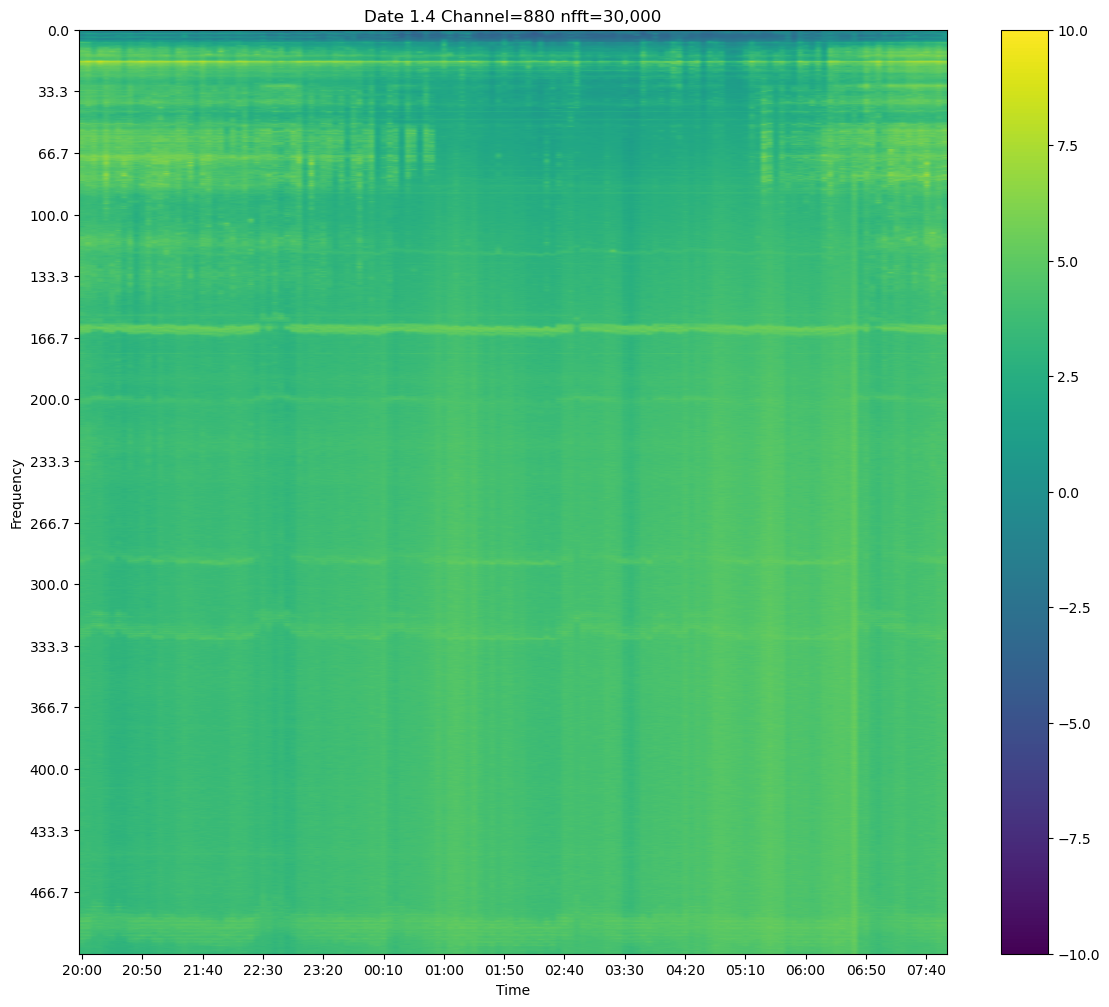

In [ ]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
with h5py.File('../output/DAS/psd.hdf5', 'r') as f:
    dset = f['ch880']
    time = [key  for key in f.keys()][0:144]
    start = time.index('20:00:12')
    time = time[start:]+time[:start]
    print(time)
    psd =  np.array([f[key][:] for key in time])
    psd = np.log(psd)
    plt.figure(figsize=(14,12))
    plt.imshow(psd.T, aspect='auto', cmap='viridis',vmin=-10, vmax=10)
    xstick = [10*i for i in range(15)]
    ystick = [1000*i for i in range(15)]
    print(psd[0].shape)
    print(f['frequency'].shape)

    plt.xticks(xstick , [time[i][:5]  for i in xstick],rotation = 0)
    plt.yticks(ystick , ['%.1f'%f['frequency'][i]  for i in ystick])
    # plt.yscale('log')
    plt.ylabel("Frequency")
    plt.xlabel("Time")
    plt.title("Date 1.4 Channel=880 nfft=30,000")

    plt.colorbar()
    f.close()

In [ ]:
# import h5py
# def write_h5(feature,name):
#     result_path = '../output/DAS/psd_30s.hdf5'
#     group_name = "ch880"
#     if not os.path.exists(result_path):
#         file = h5py.File(result_path, "w")
#     if not file.__contains__(group_name):   #判断这个组存不存在
#         my_group = file.create_group(group_name)
#     else:
#         file = h5py.File(result_path, 'a')
#         my_group = file[group_name]

#     my_group.create_dataset(name, data=feature)
#     file.close()

In [ ]:
# import librosa
# import glob
# from scipy import signal
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# # Load the audio file
# path = '../output/noise/'
# if not os.path.exists(path):
#     os.makedirs(path)
#     print("Folder created")
# else:
#     print("Folder already exists")

# for n in range(1,6):
#     test_n = str(n)
#     AUDIO_FILE = '../噪音数据/2024.1.4_留仙大道噪声测试/测试'+test_n+'/测试'+test_n+'.m4a'
#     samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
#     samples = samples[ : 32421888]

#     data = samples
#     # data1 = dp.das_preprocess(data)
#     nt = data.shape[0]

#     window = signal.windows.tukey(nt, 0.2) #taping
#     data2 = data * window[:]
#     sos = signal.butter(6, 400, 'lp', fs=sample_rate, output='sos') # lowpass
#     data2 = signal.sosfiltfilt(sos, data2)
#     nfft = 40000 #psd 窗长度

#     # data2 = dp.das_preprocess(data2)
#     print(samples.size , sample_rate)

#     N = samples.size
#     #pdt
#     x = data2
    
#     fs = sample_rate
#     plt.figure(figsize=(12,12))
#     plt.axis([-500,500,-120,-60])
#     plt.title("test_"+test_n)

#     [Pxx1,f1] = plt.psd(x,                       # 随机信号
#                     NFFT=nfft,               # 每个窗的长度
#                     Fs=fs,                   # 采样频率
#                     detrend='mean',          # 去掉均值
#                     window=np.hanning(nfft), # 加汉尼窗
#                     noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
#                     sides='twosided')        # 求双边谱

#     plt.savefig(path+'/test'+test_n+'_noise_psdv2_lp400.png')
#     plt.show()
#     plt.close


